### Assignment 1 v2
Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется $O(\frac{1}{m} + \frac{L}{p})$. Подробнее в материалах лекции.
Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.


In [1]:
import numpy as np
import random
from random import choice
from bitarray import bitarray
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
L = np.linspace(10, 100, 11)

In [3]:
p = [101, 131, 223, 311, 409, 593, 659, 769, 881, 997]

In [4]:
def get_strings(len_str):
    strings = set()
    
    while len(strings) < 1000:
        string = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for _ in range(len_str))
        strings.add(string)
                
    return strings

In [5]:
def hash_int(x, p, a=30, b=4):
    return (a*x + b) % p

In [6]:
def poly_hash(s, p=997):
    x = 31
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return hash_int(h, p)

In [7]:
def fpr(S, L, p):
    fp = 0
    arr = bitarray('0' * p)

    strings = get_strings(L)
    
    for string in strings:
        h = poly_hash(string, p)
        if arr[h] == 0: 
            arr[h] = 1
        elif arr[h] == 1:
            fp += 1

    return fp * 2 / (S * (S - 1))

#### Зависимость FPR от L

In [8]:
L_fpr = []
for l in L:
    L_fpr.append(fpr(1000, int(l), p[-1]))

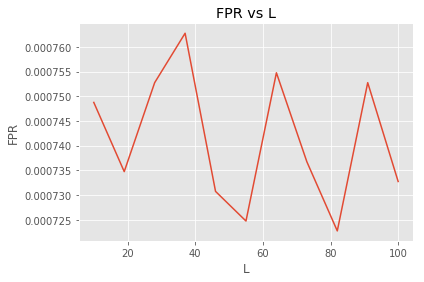

In [9]:
plt.plot(L, L_fpr)
plt.title('FPR vs L')
plt.xlabel('L')
plt.ylabel('FPR');

In [10]:
L_fpr_mean = []
L_fpr_std = []


for l in L:
    l_list = []
    l_list.append(fpr(1000, int(l), p[-1]))
    L_fpr_mean.append(np.mean(l_list))
    L_fpr_std.append(np.std(l_list))

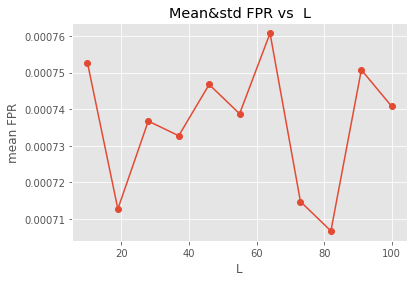

In [11]:
plt.errorbar(L, L_fpr_mean, L_fpr_std, fmt='-o')
plt.title('Mean&std FPR vs  L')
plt.xlabel('L')
plt.ylabel('mean FPR');

#### Зависимость FPR от p

In [12]:
p_fpr = []
for p_ in p:
    p_fpr.append(fpr(1000, int(L[0]), p_))

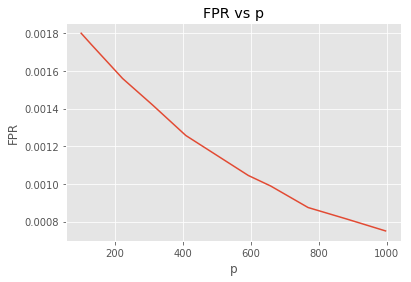

In [13]:
plt.plot(p, p_fpr)
plt.title('FPR vs p')
plt.xlabel('p')
plt.ylabel('FPR');

In [14]:
p_fpr_mean = []
p_fpr_std = []

for p_ in p:
    p_list = []
    p_list.append(fpr(1000, int(L[0]), p_))
    p_fpr_mean.append(np.mean(p_list))
    p_fpr_std.append(np.std(p_list))

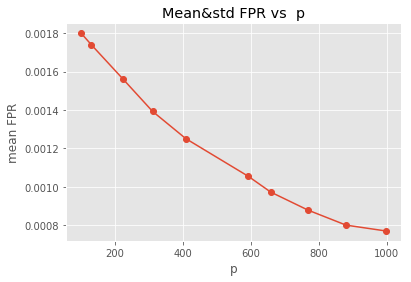

In [15]:
plt.errorbar(p, p_fpr_mean, p_fpr_std, fmt='-o')
plt.title('Mean&std FPR vs  p')
plt.xlabel('p')
plt.ylabel('mean FPR');